# Name: Hamza Waheed


### Load the MNIST Dataset 
1. Import the MNIST dataset using TensorFlow/Keras. 
2. Normalize the pixel values to the range [0, 1]. 

In [2]:

from tensorflow.keras.datasets import mnist 
import numpy as np 
# Load the MNIST dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Add a channel dimension to make it compatible with CNN layers
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [6]:
print("Training data shape: ", x_train.shape)
print("Training data shape: ", x_train.shape)

Training data shape:  (60000, 28, 28, 1)
Training data shape:  (60000, 28, 28, 1)


### 2. Add Noise to the Dataset
1. Introduce Gaussian noise to the MNIST dataset. 
2. Ensure the noisy pixel values remain in the range [0, 1] using np.clip()

In [7]:
noise_factor = 0.5 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, 
size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, 
size=x_test.shape)

In [8]:
# Clip pixel values to be in [0, 1] 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [9]:
print("Noisy training data shape:", x_train_noisy.shape)

Noisy training data shape: (60000, 28, 28, 1)


### 3. Visualize the Dataset
Plot a few examples of the original and noisy images.

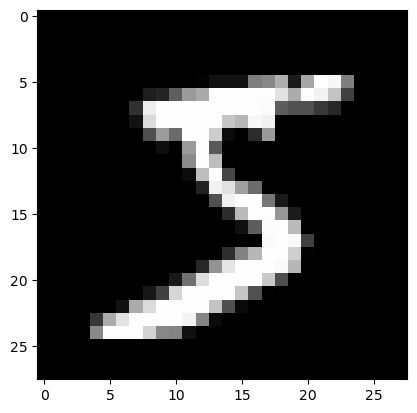

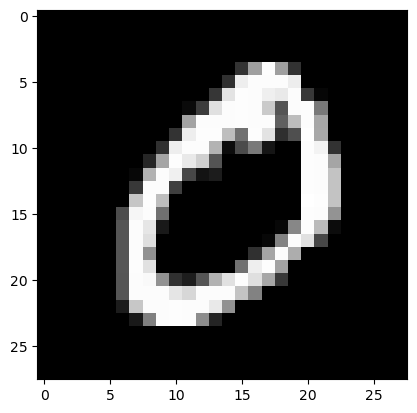

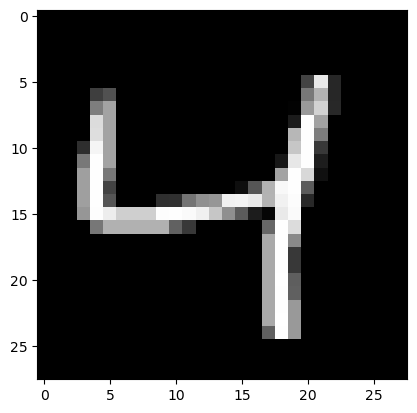

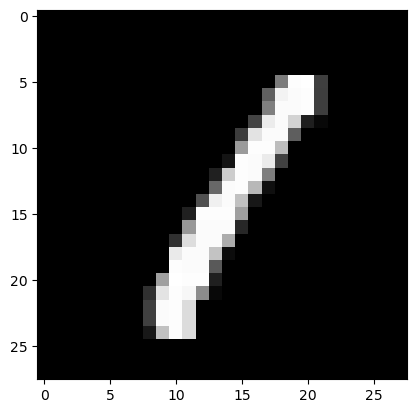

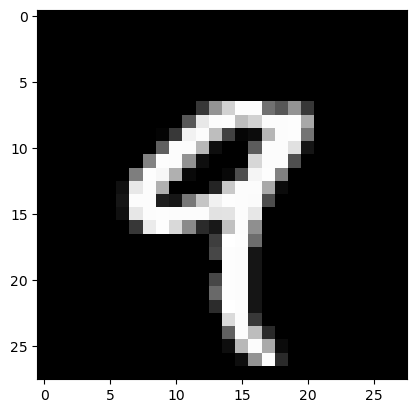

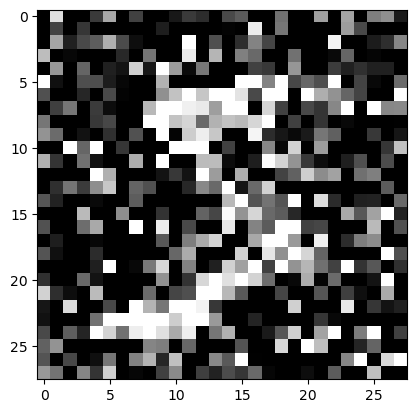

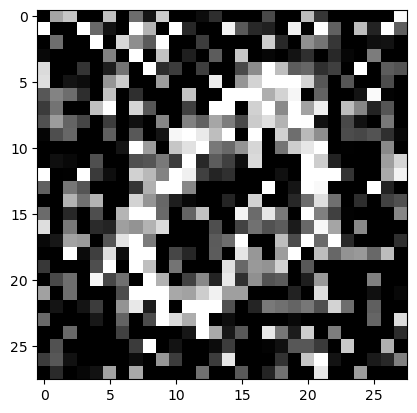

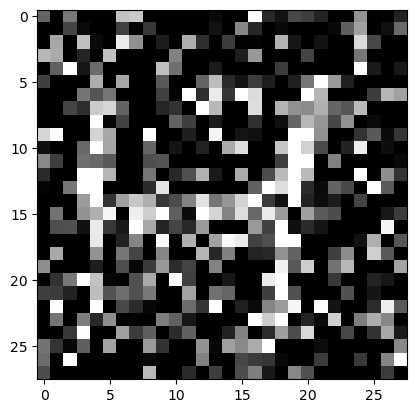

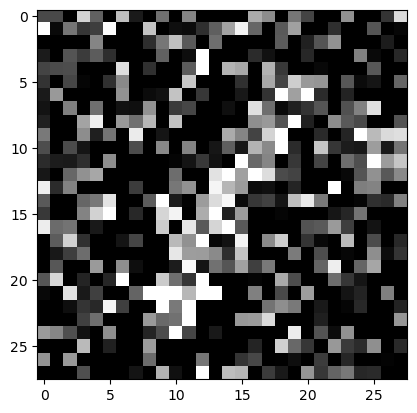

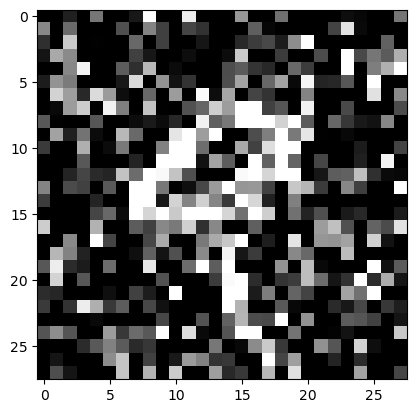

In [13]:
import matplotlib.pyplot as plt

for i in range(0, 5):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()
for i in range(0, 5):
    plt.imshow(x_train_noisy[i], cmap='gray')
    plt.show()

### 4. Design the Convolutional Autoencoder
The autoencoder should have: 
1. Encoder: 
    - A series of convolutional layers to extract features and reduce spatial dimensions. 
    - Pooling layers to downsample the feature maps. 
2. Decoder: 
    - Transposed convolution (or upsampling) layers to restore spatial dimensions. 
    - A final convolutional layer to reconstruct the cleaned image. 

3. Architecture: 
- Input: Shape (28, 28, 1) (grayscale MNIST images). 
- Encoder: 
    - Conv2D with 32 filters, kernel size (3, 3), ReLU activation, and same padding. 
    - MaxPooling2D with pool size (2, 2) to reduce dimensions. 
    - Conv2D with 64 filters, kernel size (3, 3), ReLU activation, and same padding. 
    - MaxPooling2D with pool size (2, 2). 
- Decoder: 
    - Conv2D with 64 filters, kernel size (3, 3), ReLU activation, and same padding. 
    - UpSampling2D to increase dimensions. 
    - Conv2D with 32 filters, kernel size (3, 3), ReLU activation, and same padding. 
    - UpSampling2D. 
    - Conv2D with 1 filter, kernel size (3, 3), sigmoid activation, and same padding 
    (output layer).


In [24]:
from tensorflow.keras import layers, models

input_shape = (28, 28, 1)

autoencoder = models.Sequential([ # Encoding 
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape), 
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'), 
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'), 
    
    # Decoding 
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    layers.UpSampling2D((2, 2)), 
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'), 
    layers.UpSampling2D((2, 2)), 
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same') 
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### 5. Train the Autoencoder 
1. Use the noisy images as inputs and the original images as targets. 
2. Train the model for 10 epochs with a batch size of 128

In [29]:
# Train the Autoencoder 
autoencoder.fit( 
    x_train_noisy, x_train,  
    epochs=20,  
    batch_size=128,  
    validation_data=(x_test_noisy, x_test) 
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 143ms/step - loss: 0.2270 - val_loss: 0.1129
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - loss: 0.1111 - val_loss: 0.1054
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - loss: 0.1052 - val_loss: 0.1019
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 161ms/step - loss: 0.1022 - val_loss: 0.1002
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - loss: 0.1003 - val_loss: 0.0985
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - loss: 0.0992 - val_loss: 0.0976
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - loss: 0.0979 - val_loss: 0.0967
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - loss: 0.0972 - val_loss: 0.0960
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - loss: 0.0963 - val_loss: 0.0960
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 149ms/step - loss: 0.0959 - val_loss: 0.0954
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - loss: 0.0954 - val_loss: 0.0948
Epoch 12/20
469/469

### 6. Evaluate and Visualize the Results 
1. Use the trained autoencoder to clean the noisy test images. 
2. Compare the original, noisy, and denoised images

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


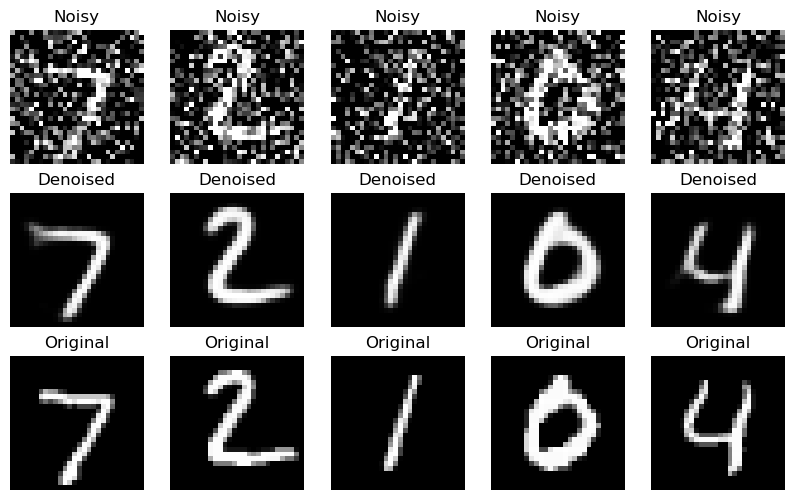

In [30]:
# Denoise the test images 
denoised_images = autoencoder.predict(x_test_noisy) 
 
# Visualize noisy and denoised images 
n = 5  # Number of images to display 
plt.figure(figsize=(10, 6)) 
for i in range(n): 
    # Noisy images 
    ax = plt.subplot(3, n, i + 1) 
    plt.imshow(x_test_noisy[i].squeeze(), cmap="gray") 
    plt.title("Noisy") 
    plt.axis("off") 
 
    # Denoised images 
    ax = plt.subplot(3, n, i + 1 + n) 
    plt.imshow(denoised_images[i].squeeze(), cmap="gray") 
    plt.title("Denoised") 
    plt.axis("off") 
 
    # Original images 
    ax = plt.subplot(3, n, i + 1 + 2*n) 
    plt.imshow(x_test[i].squeeze(), cmap="gray") 
    plt.title("Original") 
    plt.axis("off") 
plt.show() 

In [31]:

# Evaluate the model 
test_loss = autoencoder.evaluate(x_test_noisy, x_test) 
print(f'Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0924
Test Loss: 0.09309321641921997
